<a href="https://colab.research.google.com/github/vishalkumarlondon/data-viz-coursework-group-2/blob/master/colab-notebooks/venue_data_coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# #get Google Place API responses for each city
# !wget https://storage.cloud.google.com/public-data-data_viz-2/fw19_placesapi_reponse_clean.csv

In [0]:
# #get Foursquare Place API responses for each city
# !wget https://storage.cloud.google.com/public-data-data_viz-2/fw19_foursquareapi_reponse_clean.csv

In [0]:
!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 285kB/s 
     |████████████████████████████████| 10.4MB 44.5MB/s 


In [0]:
import geopandas as gpd

In [0]:
import pandas as pd

google = pd.read_csv('https://raw.githubusercontent.com/vishalkumarlondon/data-viz-coursework-group-2/master/data/fw19_placesapi_reponse_clean.csv')
foursquare = pd.read_csv('https://raw.githubusercontent.com/vishalkumarlondon/data-viz-coursework-group-2/master/data/fw19_foursquareapi_reponse_clean.csv')

print(google.shape, foursquare.shape)

(8456, 10) (12661, 9)


In [0]:
google.drop('Unnamed: 0', axis=1, inplace=True)
foursquare.drop('Unnamed: 0', axis=1, inplace=True)

In [0]:
google.head()

,Neighborhood,city,name,address,rating,user_ratings_total,types,lat,long
0,Louvre,Paris,Paris,Paris,NaN,NaN,"['lodging', 'point_of_interest', 'establishment']",48.856614,2.352222
1,Louvre,Paris,Hôtel Ducs de Bourgogne,"19 Rue du Pont Neuf, Paris",4.6,104.0,"['lodging', 'point_of_interest', 'establishment']",48.860348,2.344054
2,Louvre,Paris,Hotel Relais Du Louvre,"19 Rue des Prêtres Saint-Germain l'Auxerrois, ...",4.2,329.0,"['lodging', 'point_of_interest', 'establishment']",48.859246,2.341005
3,Louvre,Paris,L'Empire Paris,"48 Rue de l'Arbre Sec, Paris",4.5,111.0,"['lodging', 'point_of_interest', 'establishment']",48.860725,2.342583
4,Louvre,Paris,Hôtel 3 étoiles de la Place du Louvre Paris 1e...,"21 Rue des Prêtres Saint-Germain l'Auxerrois, ...",4.0,233.0,"['lodging', 'point_of_interest', 'establishment']",48.859222,2.340905


In [0]:
google.types.value_counts()[:10]

['point_of_interest', 'establishment']                                  953
['lodging', 'point_of_interest', 'establishment']                       710
['restaurant', 'food', 'point_of_interest', 'establishment']            301
['doctor', 'health', 'point_of_interest', 'establishment']              207
['bar', 'restaurant', 'food', 'point_of_interest', 'establishment']     173
['health', 'point_of_interest', 'establishment']                        139
['church', 'place_of_worship', 'point_of_interest', 'establishment']    108
['point_of_interest', 'store', 'establishment']                         101
['real_estate_agency', 'point_of_interest', 'establishment']             81
['dentist', 'health', 'point_of_interest', 'establishment']              64
Name: types, dtype: int64

In [0]:
google.columns = ['neighborhood', 'city', 'venue_name', 'venue_address', 'venue_rating',
       'user_ratings_total', 'venue_types', 'venue_latitude', 'venue_longitude']

In [0]:
foursquare.head()

,neighborhood,neighborhood_latitude,neighborhood_longitude,venue_name,venue_category,venue_latitude,venue_longitude,city
0,Louvre,48.861,2.339,Musée du Louvre,Art Museum,48.860847,2.336440,Paris
1,Louvre,48.861,2.339,Monument de l'amiral Gaspard de Coligny,Outdoor Sculpture,48.861216,2.339395,Paris
2,Louvre,48.861,2.339,UGC Ciné Cité Les Halles,Multiplex,48.862607,2.343531,Paris
3,Louvre,48.861,2.339,Comédie-Française,Theater,48.863088,2.336612,Paris
4,Louvre,48.861,2.339,Intersport,Sporting Goods Shop,48.860796,2.341252,Paris


In [0]:
foursquare.columns = ['neighborhood', 'neighborhood_latitude', 'neighborhood_longitude',
       'venue_name', 'venue_category', 'venue_latitude', 'venue_longitude',
       'city']

In [0]:
## Transform pandas dataframe into geopandas df! 
foursquare_geojson = gpd.GeoDataFrame(foursquare, geometry=gpd.points_from_xy(foursquare.venue_longitude, foursquare.venue_latitude), crs="EPSG:4326")
type(foursquare)

pandas.core.frame.DataFrame

In [0]:
# foursquare_geojson

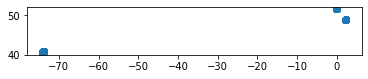

In [0]:
foursquare_geojson.plot()

In [0]:
# save the data into google bucket!
foursquare_geojson.to_crs(epsg=4326).to_file("foursquare.geojson", driver='GeoJSON')

In [0]:
google['venue_name'] = google['venue_name'].str.lower()
foursquare['venue_name'] = foursquare['venue_name'].str.lower()

In [0]:
venue_data = pd.concat([google,foursquare])

In [0]:
venue_data.shape

(21117, 12)

In [0]:
venue_data.head()

,neighborhood,city,venue_name,venue_address,venue_rating,user_ratings_total,venue_types,venue_latitude,venue_longitude,neighborhood_latitude,neighborhood_longitude,venue_category
0,Louvre,Paris,paris,Paris,NaN,NaN,"['lodging', 'point_of_interest', 'establishment']",48.856614,2.352222,NaN,NaN,NaN
1,Louvre,Paris,hôtel ducs de bourgogne,"19 Rue du Pont Neuf, Paris",4.6,104.0,"['lodging', 'point_of_interest', 'establishment']",48.860348,2.344054,NaN,NaN,NaN
2,Louvre,Paris,hotel relais du louvre,"19 Rue des Prêtres Saint-Germain l'Auxerrois, ...",4.2,329.0,"['lodging', 'point_of_interest', 'establishment']",48.859246,2.341005,NaN,NaN,NaN
3,Louvre,Paris,l'empire paris,"48 Rue de l'Arbre Sec, Paris",4.5,111.0,"['lodging', 'point_of_interest', 'establishment']",48.860725,2.342583,NaN,NaN,NaN
4,Louvre,Paris,hôtel 3 étoiles de la place du louvre paris 1e...,"21 Rue des Prêtres Saint-Germain l'Auxerrois, ...",4.0,233.0,"['lodging', 'point_of_interest', 'establishment']",48.859222,2.340905,NaN,NaN,NaN


In [0]:
venue_data.venue_name.value_counts()[:20]

london                          221
new york                        194
brooklyn                         46
queens                           46
lambeth                          26
william hill                     25
ladbrokes                        24
west bronx                       21
paris                            20
subway                           17
united states postal service     17
east bronx                       15
walgreens                        13
staten island                    11
upper manhattan                  11
western union                    10
lloyds bank                       9
jd sports                         9
baskin-robbins                    8
rite aid                          8
Name: venue_name, dtype: int64

In [0]:
venue_data2 = google.merge(foursquare, how='inner', on='venue_name')

In [0]:
venue_data2.shape

(479, 16)

In [0]:
venue_data2.head()

,neighborhood_x,city_x,venue_name,venue_address,venue_rating,user_ratings_total,venue_types,venue_latitude_x,venue_longitude_x,neighborhood_y,neighborhood_latitude,neighborhood_longitude,venue_category,venue_latitude_y,venue_longitude_y,city_y
0,Popincourt,Paris,white dream,"38 Rue des Ormeaux, Paris",NaN,NaN,NaN,48.851479,2.400690,Ménilmontant,48.854000,2.406000,Hookah Bar,48.851420,2.401073,Paris
1,Buttes-Chaumont,Paris,l'étoile,"144 Avenue Jean Jaurès, Paris",4.3,43.0,"['bank', 'atm', 'finance', 'insurance_agency',...",48.886817,2.386671,Buttes-Chaumont,48.884000,2.390000,Brewery,48.887236,2.386600,Paris
2,Vaugirard,Paris,pmu,"2 Rue du Professeur Florian Delbarre, Paris",3.1,55.0,"['point_of_interest', 'establishment']",48.839957,2.271355,Panthéon,48.846000,2.361000,General Entertainment,48.848139,2.354402,NaN
3,Reuilly,Paris,hippodrome de vincennes,"2 Route de la Ferme, Paris",NaN,NaN,"['parking', 'point_of_interest', 'establishment']",48.821151,2.451674,Reuilly,48.824000,2.456000,Racecourse,48.821474,2.451110,Paris
4,Streatham South,London,london,London,NaN,NaN,"['general_contractor', 'point_of_interest', 's...",51.507351,-0.127758,Coldharbour,51.463724,-0.108506,Beach Bar,51.464175,-0.114580,NaN
